In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


### Insights we need to keep in mind while working with Im-balanced data
* Never test on the oversampled or undersampled dataset.
* If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before!
* Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix

### Data Exploration
* Except for the transaction and amount we dont know what the other columns are (due to privacy reasons).
* Columns that are unknown have been scaled already.

1. There are no "Null" values, so we don't have to work on ways to replace values.
2. Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (0.17%) of the time in the dataframe.

### Feature Technicalities:
* <b>PCA Transformation:</b> The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).
* <b>Scaling:</b> Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)

Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

In [7]:
# Check for null values
df.isnull().sum().max()

0

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df[df['Class']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Percentage of Non-fraud transaction (%): 99.82725143693798
Percentage of Fraud transaction (%): 0.1727485630620034


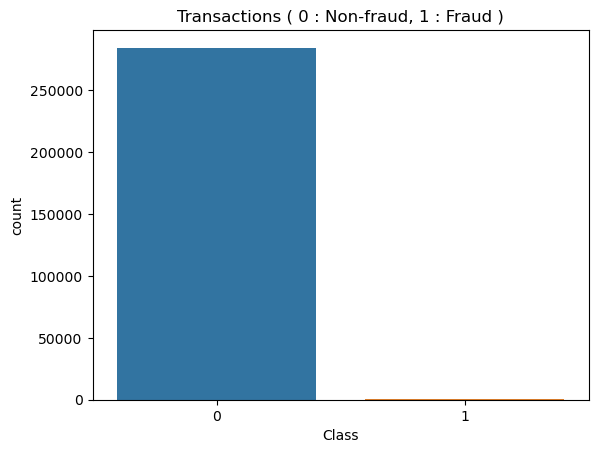

In [11]:
print("Percentage of Non-fraud transaction (%):", (df[df['Class']==0].count()['Class']/len(df))*100)
print("Percentage of Fraud transaction (%):", (df[df['Class']==1].count()['Class']/len(df))*100)
sns.countplot(data = df, x = 'Class')
plt.title("Transactions ( 0 : Non-fraud, 1 : Fraud )")
plt.show()

##### Observation:
* It's a clear example of imbalanced problem.
* If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud.

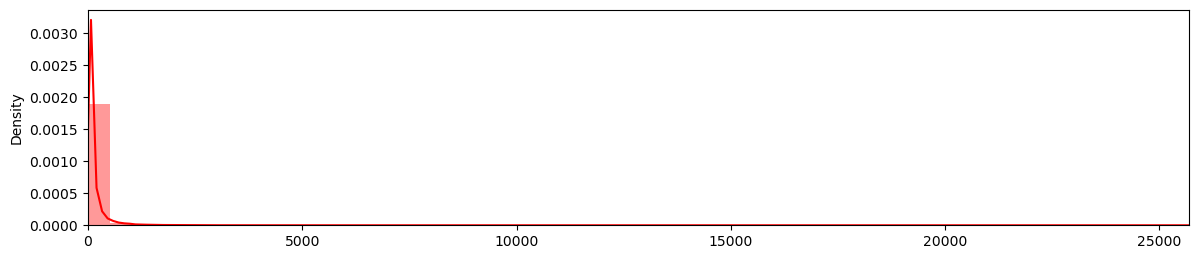

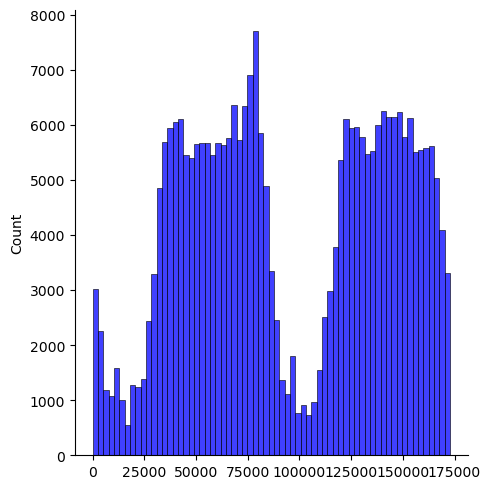

In [12]:

fig, ax = plt.subplots(2, 1, figsize = (12, 5))

sns.distplot(df['Amount'].values, ax=ax[0], color='r' )
ax[0].set_xlim([min(df['Amount']), max(df['Amount'])])

sns.displot(df['Time'].values, ax = ax[1], color='b')
ax[1].set_xlim([min(df['Time']), max(df['Time'])] )
fig.delaxes(ax[1])
fig.tight_layout()
plt.show()

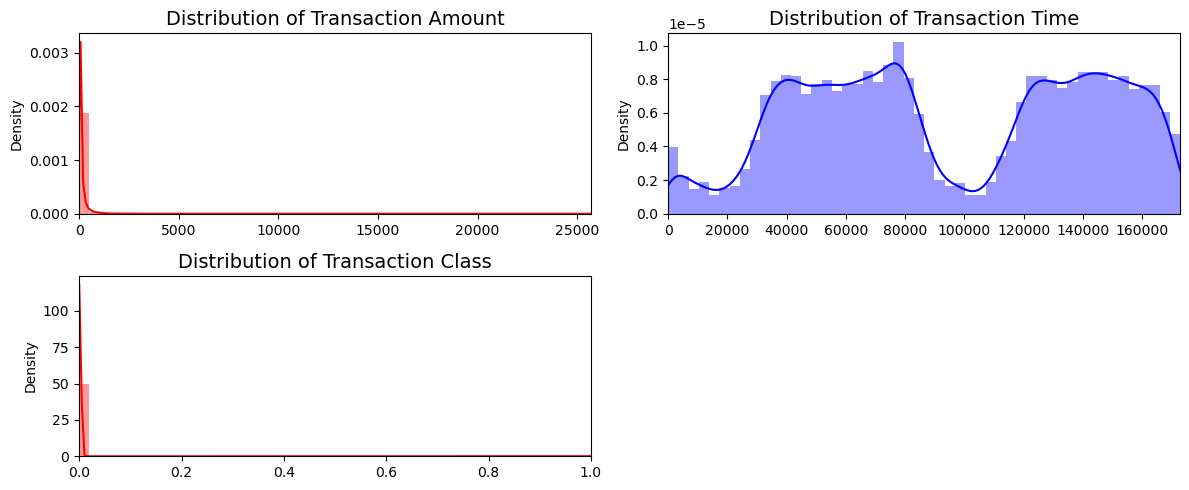

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5))

amount_val = df['Amount'].values
time_val = df['Time'].values
class_val = df['Class'].values

sns.distplot(amount_val, ax=ax[0,0], color='r')
ax[0,0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0,0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[0,1], color='b')
ax[0,1].set_title('Distribution of Transaction Time', fontsize=14)
ax[0,1].set_xlim([min(time_val), max(time_val)])

sns.distplot(class_val, ax=ax[1,0], color='r')
ax[1,0].set_title('Distribution of Transaction Class', fontsize=14)
ax[1,0].set_xlim([min(class_val), max(class_val)])

# sns.distplot(time_val, ax=ax[4], color='b')
# ax[4].set_title('Distribution of Transaction Time', fontsize=14)
# ax[4].set_xlim([min(time_val), max(time_val)])
fig.delaxes(ax[1][1])
fig.tight_layout()
plt.show()

### Scaling and Distributing
* In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. 
* On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

##### What is a sub-Sample?
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.
##### Why do we create a sub-Sample?
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:
* Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
* Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

##### Summary:
* Scaled amount and scaled time are the columns with scaled values.
* There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
* We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

In [14]:
from sklearn.preprocessing import RobustScaler
rb_sc = RobustScaler()
# RobustScaler is less prone to outliers.
df[['Time', 'Amount']] = rb_sc.fit_transform(df[['Time', 'Amount']])

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


### Splitting the Data (Original DataFrame)
* Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. 
* Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. 
* The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [16]:
X = df.drop(columns=['Class'])
y = df['Class']

In [17]:
from sklearn.model_selection import StratifiedKFold, train_test_split

X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size = 0.33, stratify = y)

In [18]:
train_class_label,train_count_label = np.unique(y_train, return_counts = True)
test_class_label,test_count_label = np.unique(y_test, return_counts = True)

In [19]:
print("The train dataset contains class", train_class_label[0], ':', train_count_label[0]/len(y_train))
print("The train dataset contains class", train_class_label[1], ':', train_count_label[1]/len(y_train))
print("The test dataset contains class ", test_class_label[0], ':', test_count_label[0]/len(y_test))
print("The test dataset contains class ", test_class_label[1], ':', test_count_label[1]/len(y_test))

The train dataset contains class 0 : 0.9982706215281417
The train dataset contains class 1 : 0.0017293784718582959
The test dataset contains class  0 : 0.9982763573685722
The test dataset contains class  1 : 0.0017236426314277506


* We got the classes follow same ratio for train and test dataset

### Random Under-Sampling:


In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

##### Steps:
* The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
* Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
* After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

###### Note: 
The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [20]:
# Let's create a sample subset with equal ratios.
df.sample(frac=1) # Shuffling
df_sub = df[df['Class']==1]
df_sub = pd.concat([df[df['Class']==0][:len(df[df['Class']==1])],df_sub], axis=0)
df_sub_o = df_sub[:]

In [21]:
df_sub

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,0.992140,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.142178,1
280143,0.994549,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.296793,1
280149,0.994596,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.780968,1
281144,1.001821,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,3.116048,1


### Correlation Matrices
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

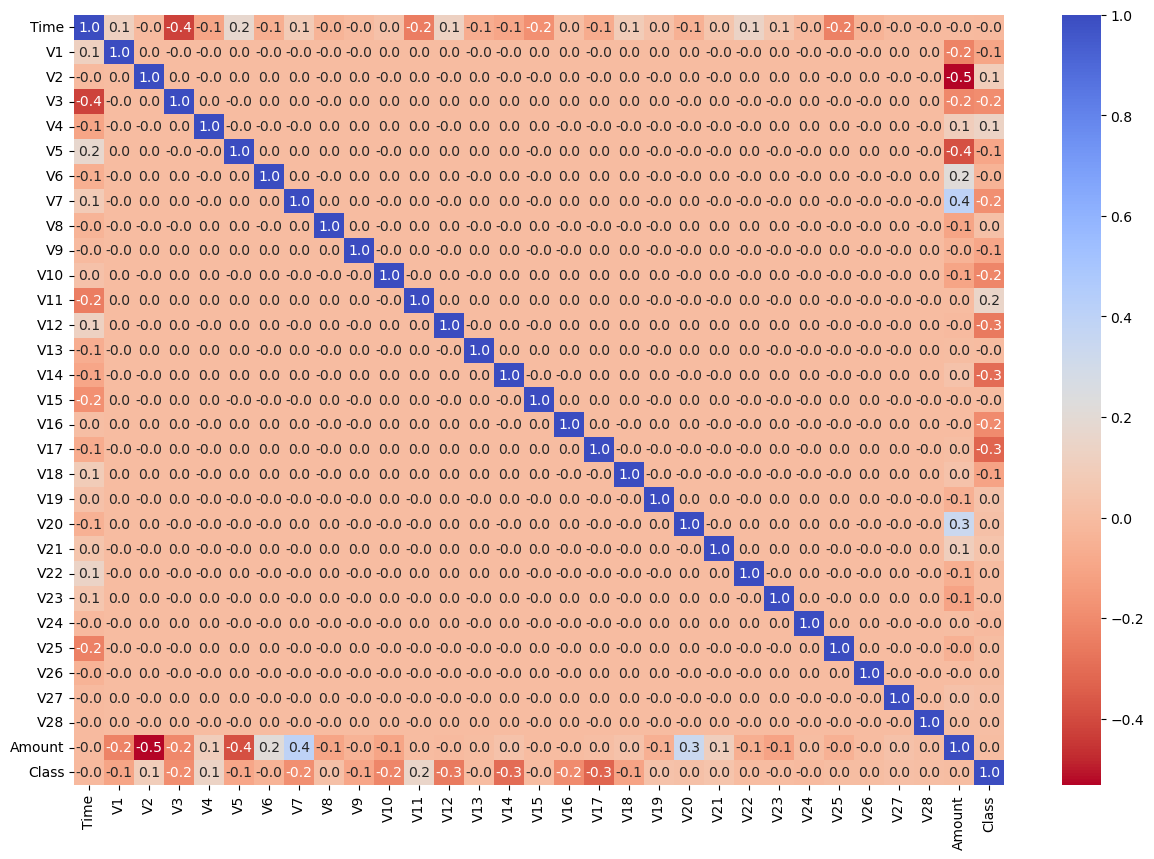

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, fmt='.1f', cmap='coolwarm_r')
plt.show()

#### Note: 
We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

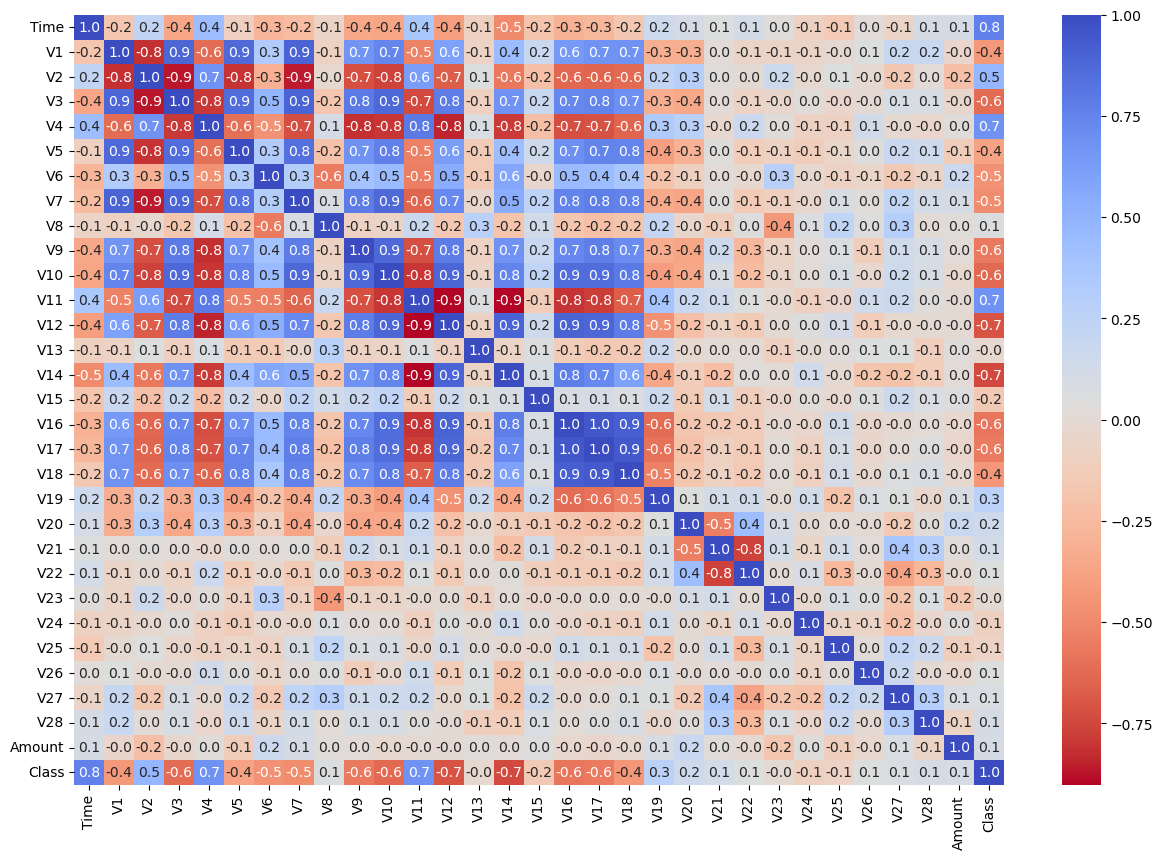

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df_sub.corr(), annot= True, fmt='.1f', cmap='coolwarm_r')
plt.show()

In [24]:
target_pos_corr_features_dict = {}
target_neg_corr_features_dict = {}

for i in (df_sub.corr()['Class'].index):
    if abs(df_sub.corr()['Class'][i])>0.3:
        if df_sub.corr()['Class'][i]>0:
            target_pos_corr_features_dict[i] = df_sub.corr()['Class'][i]
        else:
            target_neg_corr_features_dict[i] = df_sub.corr()['Class'][i]        
        print(i, ':', df_sub.corr()['Class'][i])


Time : 0.766174730581417
V1 : -0.4264222579799858
V2 : 0.4781134763601702
V3 : -0.6139626408086095
V4 : 0.6856721367660027
V5 : -0.378402075155252
V6 : -0.45772131174034947
V7 : -0.4842493027545724
V9 : -0.5649551164129032
V10 : -0.6315317138004807
V11 : 0.675407708454411
V12 : -0.7011954580873327
V14 : -0.7390618495708535
V16 : -0.579322860962153
V17 : -0.5545303312286097
V18 : -0.43587345928999566
Class : 1.0


In [25]:
target_neg_corr_features_dict

{'V1': -0.4264222579799858,
 'V3': -0.6139626408086095,
 'V5': -0.378402075155252,
 'V6': -0.45772131174034947,
 'V7': -0.4842493027545724,
 'V9': -0.5649551164129032,
 'V10': -0.6315317138004807,
 'V12': -0.7011954580873327,
 'V14': -0.7390618495708535,
 'V16': -0.579322860962153,
 'V17': -0.5545303312286097,
 'V18': -0.43587345928999566}

In [26]:
target_neg_corr_features_dict.keys()

dict_keys(['V1', 'V3', 'V5', 'V6', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18'])

In [27]:
target_pos_corr_features_dict

{'Time': 0.766174730581417,
 'V2': 0.4781134763601702,
 'V4': 0.6856721367660027,
 'V11': 0.675407708454411,
 'Class': 1.0}

In [28]:
target_pos_corr_features_dict.keys()

dict_keys(['Time', 'V2', 'V4', 'V11', 'Class'])

### Summary and Explanation:
* v1, v3, v5, v7, -v2 are strongly correlated to each other.
* v9, v10, v17 are strongly correlated to each other.
* v12, v10, v14, v16, v17, v18 are strongly correlated to each other.
* Negative Correlations: <b> 'V6', 'V9', 'V12'</b> are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
* Positive Correlations: <b>'Time', 'V2', 'V4' and 'V11'</b> are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
* BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.


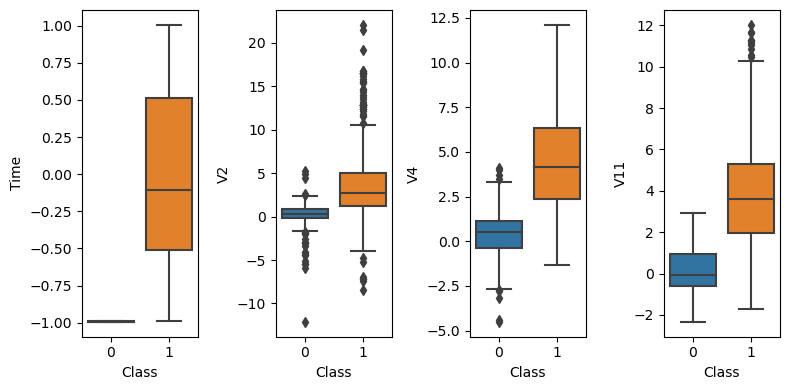

In [29]:
fig, ax = plt.subplots(1, 4, figsize=(8,4))
c=0
for i in list(target_pos_corr_features_dict.keys())[:-1]:
#     plt.figure(figsize = (4,4))
    sns.boxplot(data = df_sub, x = 'Class', y = i, ax = ax[c])
    c=c+1
#     plt.title("Positively Correlated Feature : "+i)
plt.tight_layout()
plt.show()

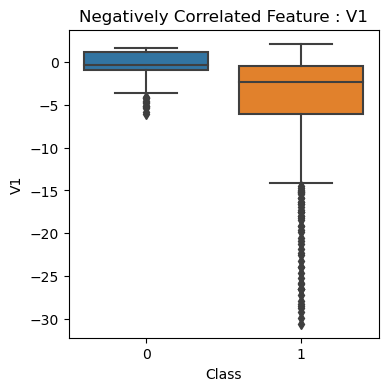

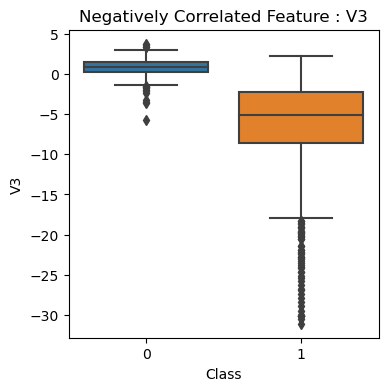

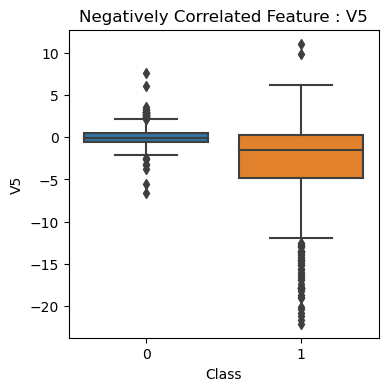

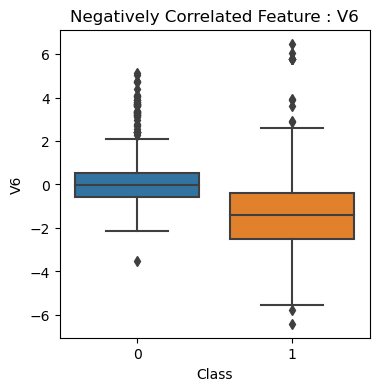

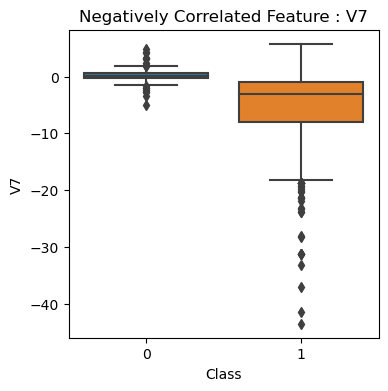

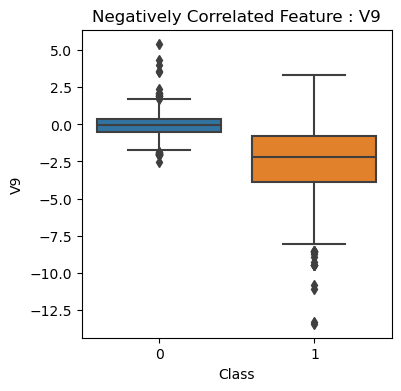

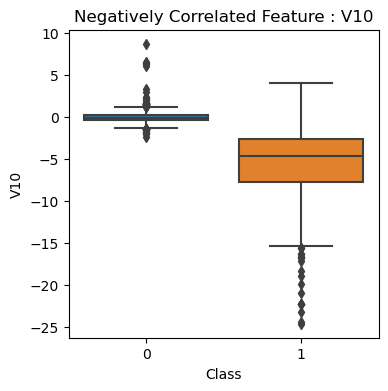

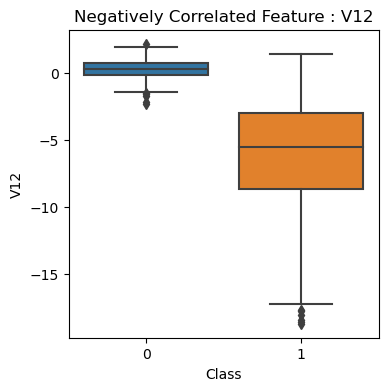

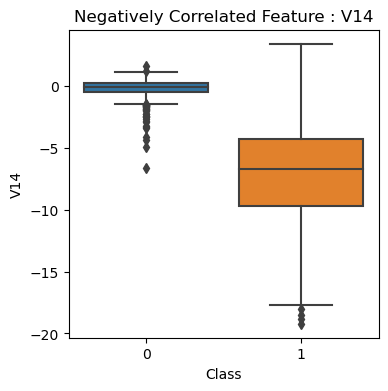

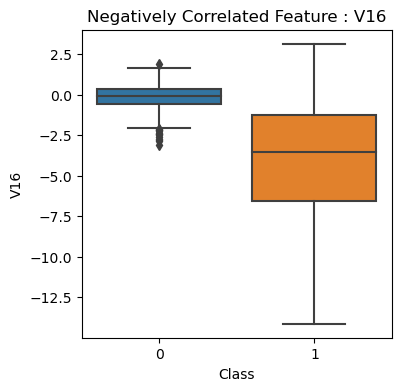

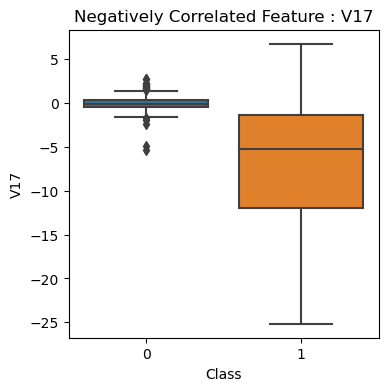

In [30]:
for i in list(target_neg_corr_features_dict.keys())[:-1]:
    plt.figure(figsize = (4,4))
    sns.boxplot(data = df_sub, x = 'Class', y = i )
    plt.title("Negatively Correlated Feature : "+i)
    plt.show()

### Anomaly Detection:


Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.


##### Interquartile Range Method:
* Interquartile Range (IQR): We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.
* Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).

##### Outlier Removal Tradeoff:
* We have to be careful as to how far do we want the threshold for removing outliers. 
* We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). 
* The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.


##### The Tradeoff: 
* The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. 
* Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. 
* You can play with this threshold and see how it affects the accuracy of our classification models.

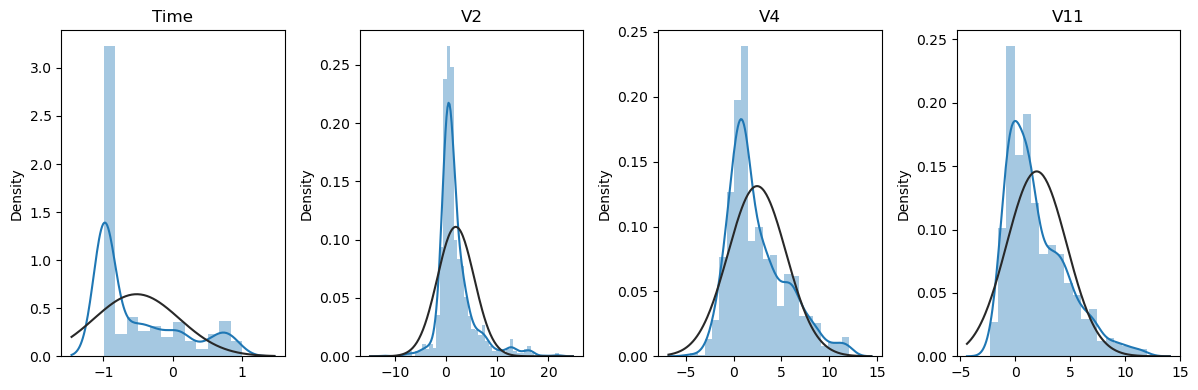

In [31]:
from scipy.stats import norm
fig, ax = plt.subplots(1, 4, figsize=(12,4))
c=0
for i in list(target_pos_corr_features_dict.keys())[:-1]:
#     plt.figure(figsize = (4,4))
    ax[c].set_title(i)
    sns.distplot(x = df_sub[i], ax = ax[c], fit = norm)
    c=c+1
    
plt.tight_layout()
plt.show()

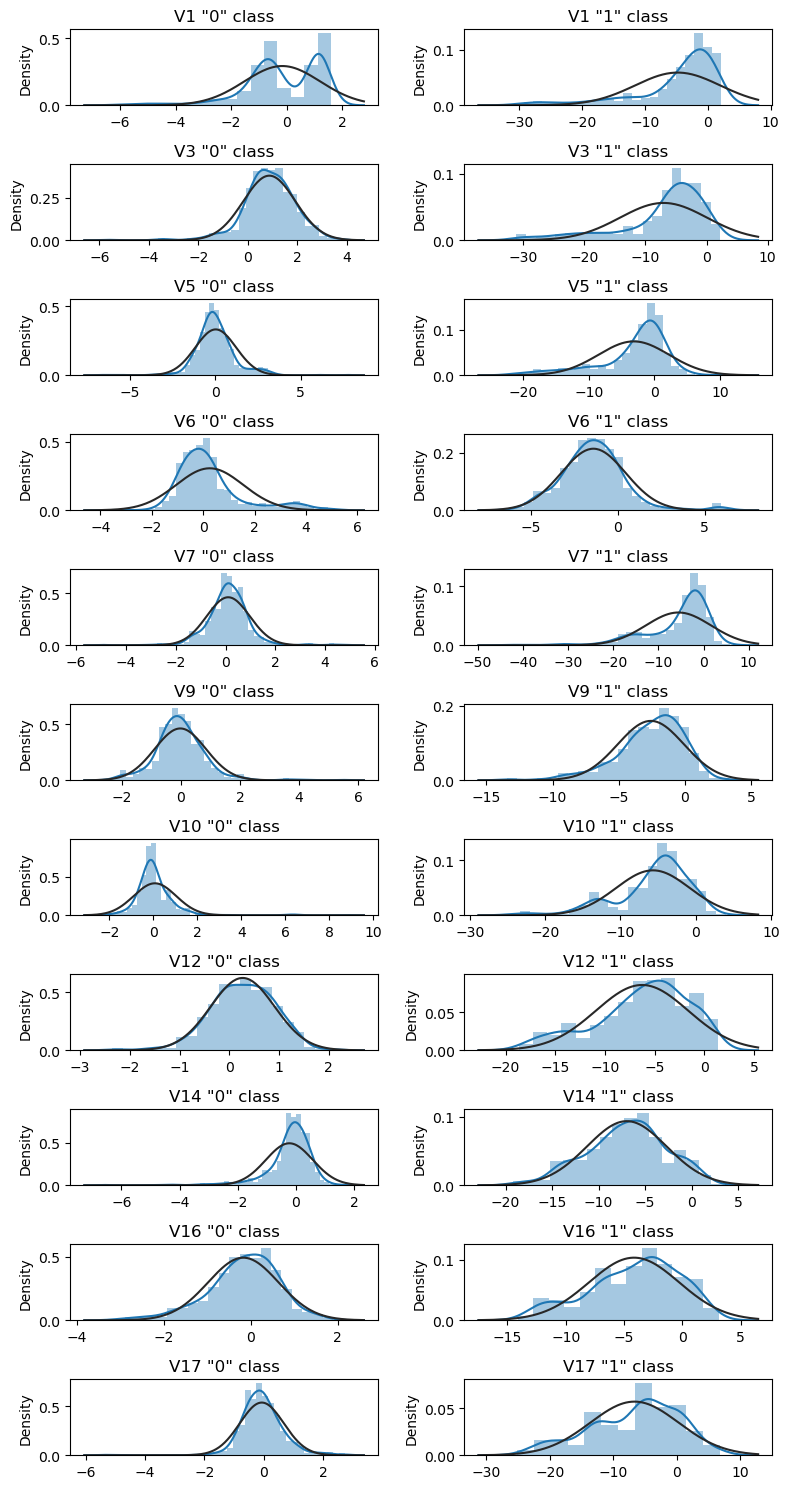

In [32]:
from scipy.stats import norm
fig, ax = plt.subplots(len(list(target_neg_corr_features_dict.keys()))-1, 2, figsize=(8,15))
c=0
for i in list(target_neg_corr_features_dict.keys())[:-1]:
#     plt.figure(figsize = (4,4))
    for j in range(0,2):
        ax[c,j].set_title(i+' "'+str(j)+'" class')
        sns.distplot(x = df_sub[df_sub['Class']==j][i], ax = ax[c,j], fit = norm)
    c=c+1
    
plt.tight_layout()
plt.show()

### Summary:
* <b>Visualize Distributions:</b> We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers.
* <b>Determining the threshold:</b> After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
* <b>Conditional Dropping:</b> Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
* <b>Boxplot Representation:</b> Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

In [33]:
outlier_index = []
thresold = 1.5
for i in list(target_pos_corr_features_dict.keys())[:-1]:
    for j in range(0,2):
        col_data = df_sub[df_sub['Class']==j][i]
        perc_25 = np.percentile(col_data, 25)
        perc_75 = np.percentile(col_data, 75)
        iqr = perc_75 - perc_25
        print('Feature :',i, ', Class : ',j)
        print('25th Percentile :', "{:.2f}".format(perc_25), ', 75th Percentile :', "{:.2f}".format(perc_75), ', IQR :', "{:.2f}".format(iqr),'\n')
        print('No of Extreme outlires :',len(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].values))
        print(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].values)
        outlier_index.extend(list(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].index))
        print('-'*100)
            
    c=c+1


Feature : Time , Class :  0
25th Percentile : -0.99 , 75th Percentile : -0.99 , IQR : 0.00 

No of Extreme outlires : 0
[]
----------------------------------------------------------------------------------------------------
Feature : Time , Class :  1
25th Percentile : -0.51 , 75th Percentile : 0.51 , IQR : 1.02 

No of Extreme outlires : 0
[]
----------------------------------------------------------------------------------------------------
Feature : V2 , Class :  0
25th Percentile : -0.17 , 75th Percentile : 0.87 , IQR : 1.03 

No of Extreme outlires : 23
[ -5.45014783   2.6001382   -4.42918377  -4.14600725   4.8473232
 -12.11421274  -3.34506106  -5.93171744  -1.9327757    4.3902302
  -2.55769421  -2.89444973  -5.08121516   5.26737615  -1.81289681
  -1.93213338   2.47098454  -5.44936906  -3.01477627  -2.00048295
  -4.45978421  -4.08841987  -3.00211987]
----------------------------------------------------------------------------------------------------
Feature : V2 , Class :  1
25th 

In [34]:
for i in list(target_neg_corr_features_dict.keys())[:-1]:
    for j in range(0,2):
        col_data = df_sub[df_sub['Class']==j][i]
        perc_25 = np.percentile(col_data, 25)
        perc_75 = np.percentile(col_data, 75)
        iqr = perc_75 - perc_25
        print('Feature :',i, ', Class : ',j)
        print('25th Percentile :', "{:.2f}".format(perc_25), ', 75th Percentile :', "{:.2f}".format(perc_75), ', IQR :', "{:.2f}".format(iqr),'\n')
        print('No of Extreme outlires :',len(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].values))
        print(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].values)
        outlier_index.extend(list(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].index))
        print('-'*100)
            
    c=c+1


Feature : V1 , Class :  0
25th Percentile : -0.90 , 75th Percentile : 1.11 , IQR : 2.01 

No of Extreme outlires : 12
[-5.40125766 -4.57509261 -4.25759744 -5.10187714 -5.28597051 -6.0932478
 -4.8160218  -4.63653366 -4.06686227 -5.85246511 -5.16629893 -4.23641944]
----------------------------------------------------------------------------------------------------
Feature : V1 , Class :  1
25th Percentile : -6.04 , 75th Percentile : -0.42 , IQR : 5.62 

No of Extreme outlires : 52
[-14.47443749 -15.39884501 -14.72462701 -15.27136186 -15.81917872
 -16.36792301 -16.91746827 -17.46771001 -18.01856119 -15.9036352
 -16.59866474 -17.27519119 -18.4748679  -19.17982641 -19.85632233
 -20.53275108 -21.20911959 -21.88543391 -22.56169926 -23.23792024
 -23.91410089 -24.59024477 -25.26635502 -25.94243445 -27.14367842
 -27.84818067 -28.52426759 -29.20032859 -29.87636551 -30.55238004
 -15.0209806  -14.97034565 -15.14044962 -16.52650657 -18.24751323
 -19.13973286 -20.9069081  -26.45774465 -26.45774465 -2

In [35]:
len(set(outlier_index))

230

In [36]:
len(df_sub)

984

In [37]:
df_sub.drop(index=set(outlier_index),inplace=True)
df_sub.reset_index(inplace=True)
df_sub

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
3,4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
4,5,-0.994960,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,279863,0.992140,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.142178,1
750,280143,0.994549,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.296793,1
751,280149,0.994596,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.780968,1
752,281144,1.001821,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,3.116048,1


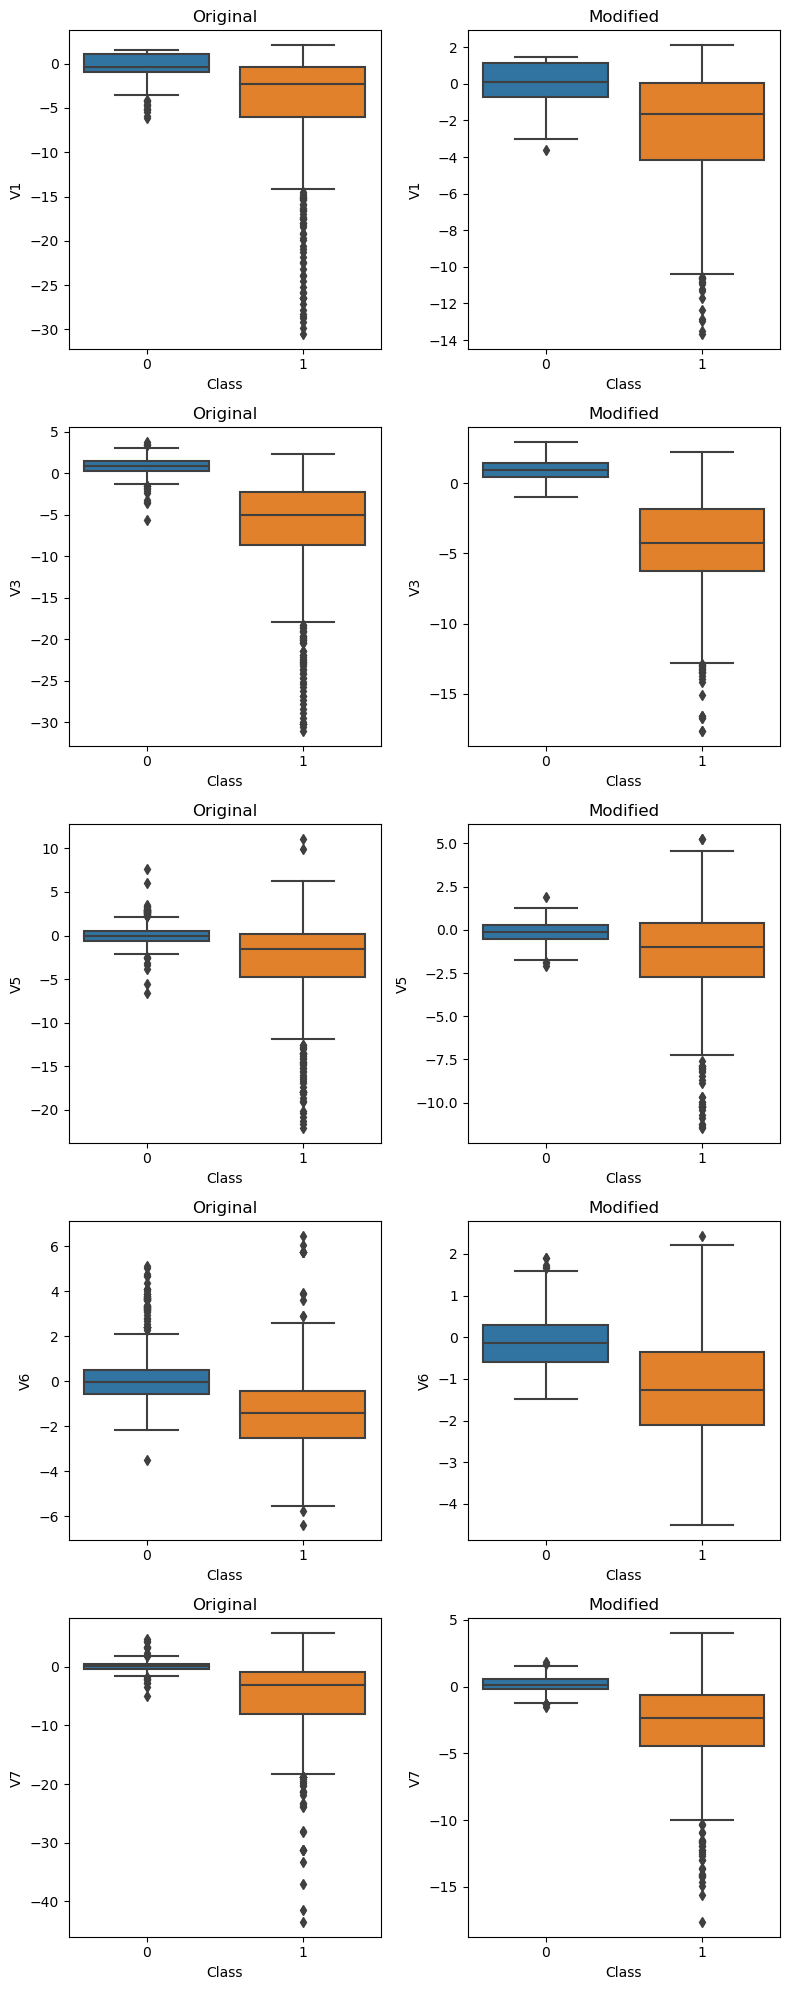

In [38]:
fig, ax = plt.subplots(len(target_pos_corr_features_dict.keys()),2, figsize=(8,20))
c=0
for i in list(target_neg_corr_features_dict.keys())[:]:
#     plt.figure(figsize = (4,4))
    if c == len(target_pos_corr_features_dict.keys()):
        break
    sns.boxplot(data = df_sub_o, x = 'Class', y = i, ax = ax[c,0])
    ax[c,0].set_title("Original")
    sns.boxplot(data = df_sub, x = 'Class', y = i, ax = ax[c,1])
    ax[c,1].set_title("Modified")
    c=c+1
#     plt.title("Positively Correlated Feature : "+i)
plt.tight_layout()
plt.show()


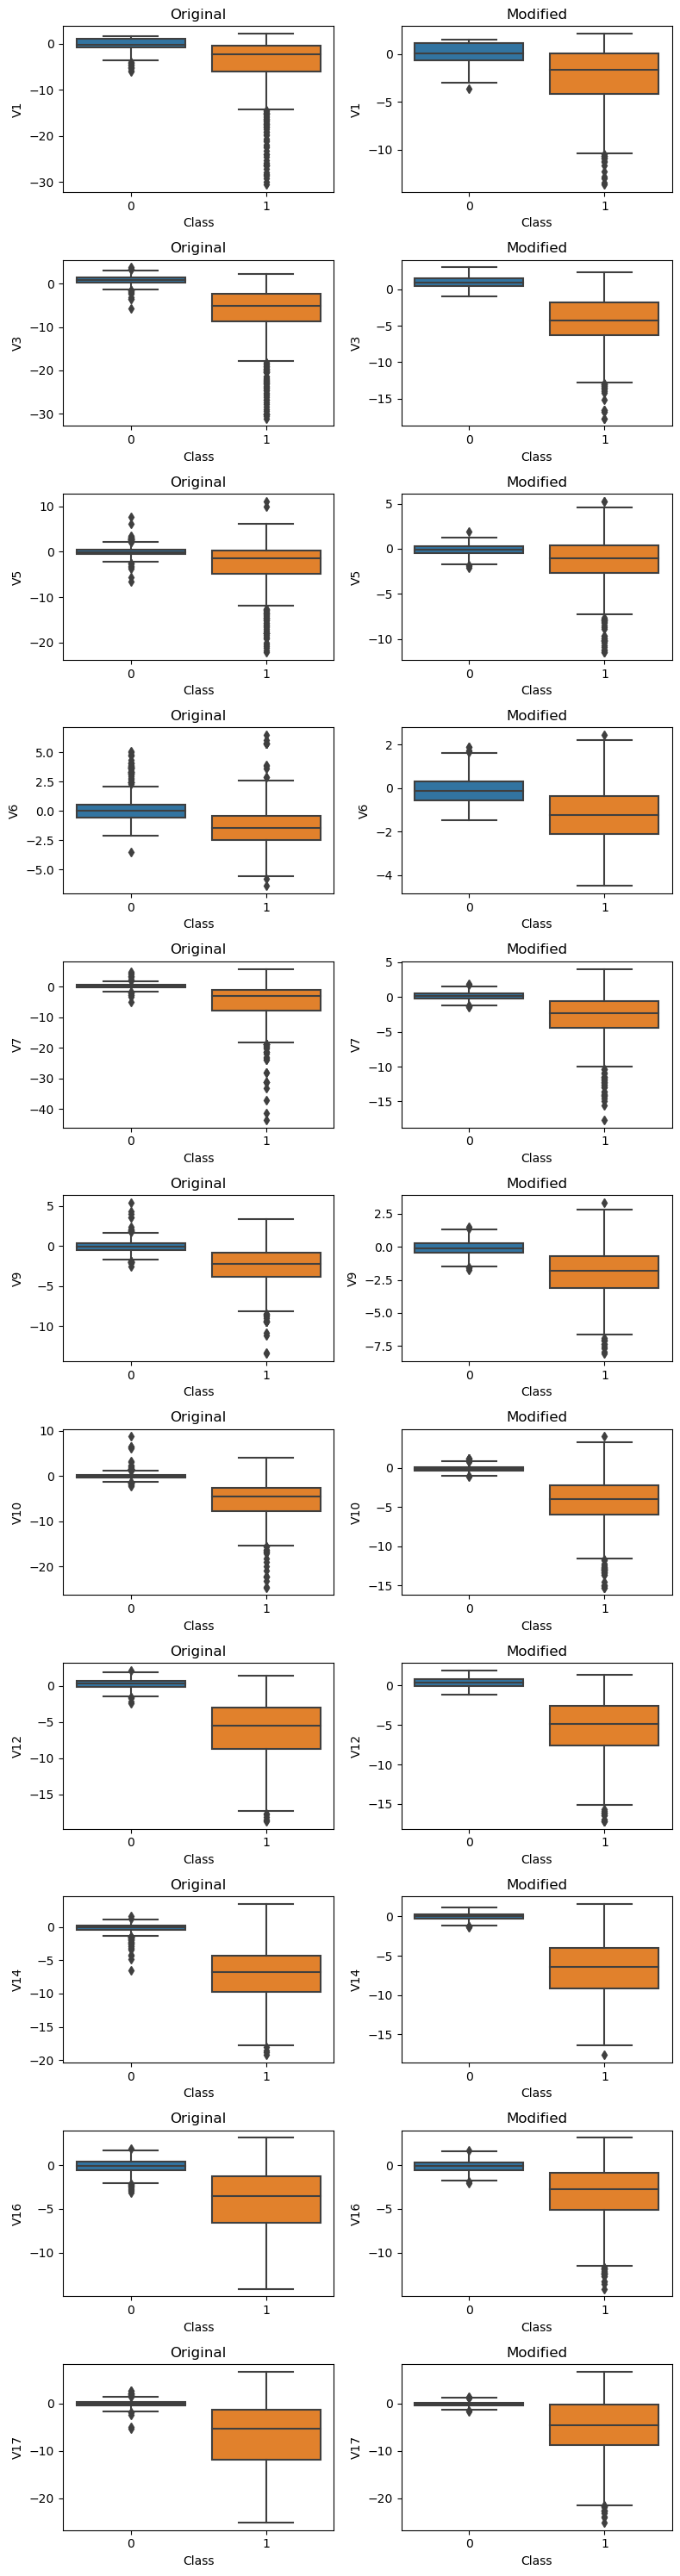

In [39]:
fig, ax = plt.subplots(len(target_neg_corr_features_dict.keys())-1,2, figsize=(8,30))
c=0
for i in list(target_neg_corr_features_dict.keys())[:-1]:
#     plt.figure(figsize = (4,4))
    sns.boxplot(data = df_sub_o, x = 'Class', y = i, ax = ax[c,0])
    ax[c,0].set_title("Original")
    sns.boxplot(data = df_sub, x = 'Class', y = i, ax = ax[c,1])
    ax[c,1].set_title("Modified")

    c=c+1
#     plt.title("Positively Correlated Feature : "+i)
plt.tight_layout()
plt.show()


In [40]:
df_sub['Class'].value_counts()

1    400
0    354
Name: Class, dtype: int64

### Dimensionality Reduction and Clustering:

#### t-SNE:

* t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning algorithm used for visualizing high- dimensional datasets. It was developed by Laurens van der Maaten and Geoffrey Hinton in 2008 and has since become a popular tool for exploratory data analysis, data visualization, and feature extraction.
* The main idea behind t-SNE is to represent each data point in a lower-dimensional space while preserving its pairwise similarities with other points in the original high-dimensional space. The algorithm accomplishes this by minimizing the Kullback-Leibler (KL) divergence between the probability distributions of the pairwise similarities in the high-dimensional space and the corresponding pairwise similarities in the low- dimensional space.
* To achieve this, t-SNE starts by computing the pairwise similarities between all pairs of data points in the high- dimensional space. These pairwise similarities are then transformed into probabilities using a Gaussian kernel with a fixed bandwidth. The Gaussian kernel determines the strength of the connection between two points based on their distance in the high-dimensional space.
* Next, t-SNE creates a low-dimensional space (typically 2D or 3D) and initializes the points randomly. It then iteratively optimizes the positions of the points in the low-dimensional space to minimize the KL divergence between the pairwise similarities in the high- dimensional space and the pairwise similarities in the low-dimensional space. The optimization is performed using gradient descent, where the gradient of the KL divergence is computed with respect to the positions of the points in the low-dimensional space.
* During the optimization process, t-SNE places more emphasis on preserving the pairwise similarities of nearby points in the high-dimensional space, while allowing more flexibility for distant points. This leads to a highly nonlinear embedding in the low-dimensional space, where nearby points in the high-dimensional space are likely to be close together, while distant points are more spread out.
* Overall, t-SNE is a powerful technique for visualizing high-dimensional data, as it can reveal complex patterns and structures that are difficult to discern in the original space. It has been successfully applied to a wide range of applications, including genomics, neuroscience, and natural language processing.

#### PCA:

* PCA was first introduced by Karl Pearson in 1901 and later independently developed by Harold Hotelling in 1933. It has since become a widely used technique in statistics, machine learning, and data analysis.
* PCA works by finding the principal components of a dataset. The first principal component is the direction in the data that explains the most variance. The second principal component is the direction that explains the most remaining variance, subject to being orthogonal to the first principal component. And so on, for all subsequent principal components.
* To find the principal components, PCA first centers the data by subtracting the mean from each variable. This ensures that the first principal component goes through the origin. Then, PCA finds the direction in the data that maximizes the variance, which is equivalent to finding the direction that minimizes the sum of squared distances between the data points and the projection onto that direction. This direction is the first principal component.
* Once the first principal component is found, PCA finds the second principal component by repeating the same process on the remaining variance, subject to being orthogonal to the first principal component. This process continues for all subsequent principal components.
* Finally, the transformed data is obtained by projecting the original data onto the principal components. The transformed data has a lower dimensionality than the original data, but retains as much of the original variation as possible.
* PCA is widely used in machine learning for dimensionality reduction, feature extraction, and data visualization. It can be used for a wide range of applications, including image recognition, natural language processing, and bioinformatics.

#### TruncatedSVD:

* Truncated SVD (Singular Value Decomposition) is a matrix factorization technique used for dimensionality reduction, noise reduction, and data compression. It is al variant of the regular SVD algorithm that only keeps a subset of the most important eigenvectors and eigenvalues of the input matrix.
* The main idea behind truncated SVD is to approximate a high-dimensional matrix with a lower-dimensional matrix that captures the most important information in the original matrix. This is done by decomposing the input matrix into three matrices: U, Sigma, and V, such that A = U* Sigma * V^T, where A is the input matrix, U is an m x k matrix of left singular vectors, Sigma is akx k diagonal matrix of singular values, and V is an xk matrix of right singular vectors.
* In truncated SVD, only the k largest singular values and their corresponding singular vectors are kept, while the remaining singular values and vectors are discarded. This effectively reduces the dimensionality of the input matrix from n to k, where k is usually much smaller than n. The truncated SVD approximation can be expressed as A'=U*Sigma' * V^T, where Sigma' is a kx k diagonal matrix of the k largest singular values, and A' is the lower-dimensional approximation of the original matrix A.
* The benefit of truncated SVD is that it provides a low- rank approximation of the input matrix that captures the most important information while discarding noise and irrelevant information. This can be useful for tasks such as data compression, where a large dataset can be compressed into a smaller representation without losing much information. Truncated SVD can also be used for noise reduction, where noisy data can be denoised by projecting it onto a lower-dimensional space.
* Overall, truncated SVD is a powerful technique for dimensionality reduction and noise reduction, and it has been successfully applied to a wide range of applications, including image processing, natural language processing, and recommender systems.

In [41]:
X_sub = df_sub.drop(columns=['Class','index'])
y_sub = df_sub['Class']

In [42]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE

In [43]:
X_reduced_pca = PCA(n_components=2, random_state = 42).fit_transform(X_sub)
X_reduced_tsne = TSNE(n_components=2, random_state = 42).fit_transform(X_sub)
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state = 42).fit_transform(X_sub)


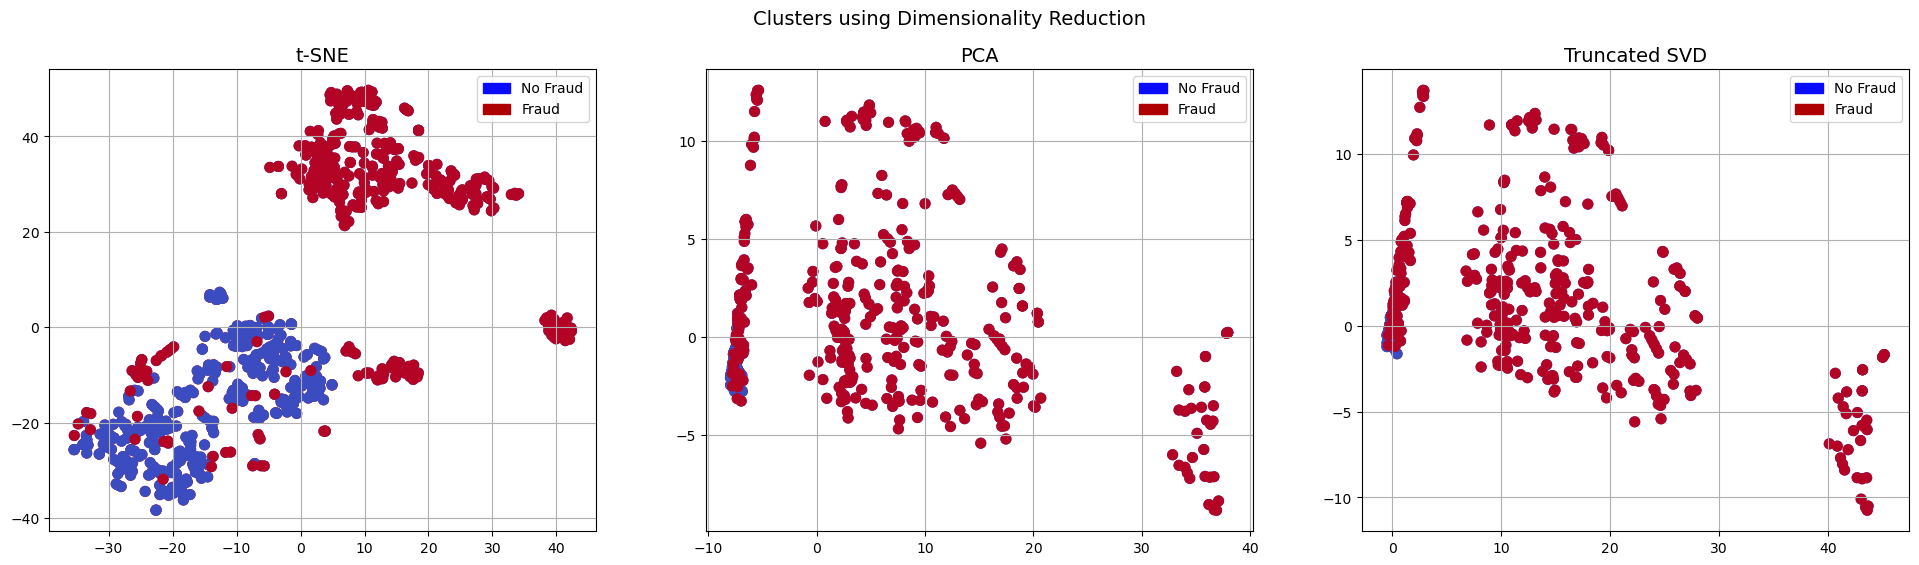

In [44]:
import matplotlib.patches as mpatches
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_sub == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_sub == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_sub == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_sub == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_sub == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_sub == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

#### Summary:
* t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.
* Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario (I shuffle the dataset before running t-SNE)
* This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases.

### Modelling

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sub.values, y_sub.values, test_size=0.33, random_state=42)

In [46]:
X_test

array([[ 0.10762579, -6.18585748,  7.10298492, ..., -0.20391733,
         0.39892719,  0.31998882],
       [-0.99184671,  0.99249595, -0.65800309, ..., -0.04983839,
         0.03596528,  1.40236149],
       [ 0.58831753, -0.96776714,  2.09801863, ...,  0.95676878,
         0.16277735, 12.62223154],
       ...,
       [-0.99317426,  1.31560131,  0.41314829, ..., -0.01675704,
         0.02464016, -0.27974569],
       [-0.89901197,  0.857321  ,  4.09391183, ...,  0.61832381,
         0.14846894, -0.29343953],
       [ 0.89104665,  0.56753927,  3.30938528, ...,  0.90267505,
         0.4735715 , -0.24187801]])

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [48]:
classifiers_dict = {
    'LogisticRegression' : LogisticRegression(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'SVC' : SVC()
}

### Using cross_val_score

In [49]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers_dict.items():
#     classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
    print(key, ':', training_score)
    print("Classifier: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score",'\n')

LogisticRegression : [0.98113208 0.97196262 0.97247706 0.98148148 0.97196262]
Classifier:  LogisticRegression Has a training score of 98.0 % accuracy score 

DecisionTreeClassifier : [1.         0.99082569 1.         1.         1.        ]
Classifier:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score 

RandomForestClassifier : [1. 1. 1. 1. 1.]
Classifier:  RandomForestClassifier Has a training score of 100.0 % accuracy score 

KNeighborsClassifier : [0.98113208 0.91089109 0.96226415 0.92156863 0.92156863]
Classifier:  KNeighborsClassifier Has a training score of 94.0 % accuracy score 

SVC : [0.98113208 0.92156863 0.96226415 0.93203883 0.93203883]
Classifier:  SVC Has a training score of 95.0 % accuracy score 



In [50]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### Using GridSearchCV

In [51]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

#### Logistic Regression 
1. Penalty: The penalty parameter in logistic regression is used to prevent overfitting. There are two types of penalties: L1 and L2. L1 penalty shrinks coefficients towards zero, while L2 penalty adds a constraint to the sum of squares of the coefficients. The penalty parameter, C, determines the strength of the regularization. A smaller value of C increases the regularization strength, and a larger value of C decreases the regularization strength. The default value for C is 1.0.

2. Solver: Solver is the optimization algorithm used to find the coefficients of the logistic regression model. There are different solver algorithms available such as 'newton-cg', 'Ibfgs', 'liblinear", 'sag', and 'saga'. The solver algorithm determines the convergence speed of the optimization algorithm. "liblinear' is the default solver for logistic regression, and it is recommended for small datasets.

3. Maximum number of iterations: The maximum number of iterations is the maximum number of iterations for the solver to converge. The solver algorithm stops iterating when the coefficients converge to a certain threshold, or when the maximum number of iterations is reached. The default value is 100.

4. Class weight: Class weight is used to balance the class distribution in the dataset. It is used to give more weight to the underrepresented class to improve the model's performance. Class weight can be set as 'balanced', which automatically adjusts weights based on the class distribution,

5. Tolerance: Tolerance is the stopping criteria for the solver. It determines how close the coefficients need to be to the optimal solution before the solver stops iterating. The default value for tolerance is 1e-4.

In [52]:
log_reg_params = {
    'penalty': ['l1', 'l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 1001], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag'],
    'max_iter': [100, 250, 500, 1000], 
    'class_weight': [None, 'balanced'], 
    'tol': [0.0001, 0.001, 0.01]
          }
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

### KNeighborsClassifier
1. n_neighbors: This is the number of neighbors used to determine the class of an input sample. The default value is 5, and it should be set based on the nature of the dataset.

2. weights: This parameter determines the weight function used in prediction. There are two options for weight function: uniform and distance. Uniform weight assigns the same weight to all points in the neighborhood, while distance weight assigns greater weight to points that are closer to the input sample. The default is uniform.

3. algorithm: This parameter determines the algorithm used to compute the nearest neighbors. The available options are "brute', 'kd_tree', and 'ball_tree'. Brute force search is used for small datasets, while kd-tree and ball-tree are used for larger datasets.

4. leaf_size: This parameter controls the size of the leaf nodes in the kd-tree or ball-tree. A smaller leaf size will result in a more precise search, but it will also increase the computation time. The default value is 30.

5. p: This parameter determines the distance metric used in the KNN algorithm. The most commonly used distance metrics are Euclidean distance (p=2) and Manhattan distance (p=1). Other distance metrics such as Minkowski distance (p>2) can also be used.

6. metric: This parameter specifies the distance metric used to calculate the distances between data points. The default metric is 'minkowski', but other metrics such as 'euclidean' and 'manhattan' can also be used.

In [53]:
knears_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['brute', 'kd_tree', 'ball_tree'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

### Support Vector Classifier
The parameters that can be tuned in SVC using GridSearchCV are:
* C: This is the regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C results in a wider margin and a smaller number of support vectors, while a larger value of C results in a narrower margin and a larger number of support vectors. The default value is 1.0.
* kernel: This parameter specifies the type of kernel function used in the SVC algorithm. The available options are ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, and ‘precomputed’. The default kernel is ‘rbf’.
* gamma: This parameter determines the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. It controls the shape of the decision boundary. A smaller gamma value results in a smoother decision boundary, while a larger gamma value results in a more complex decision boundary. If gamma is ‘auto’ or ‘scale’, then the kernel coefficient is calculated based on the number of features in the training data.
* degree: This parameter determines the degree of the polynomial kernel function (‘poly’). It is ignored by all other kernels. The default value is 3.
* coef0: This parameter is an independent term in the kernel function. It is only significant in ‘poly’ and ‘sigmoid’. The default value is 0.0.
* shrinking: This parameter controls whether to use the shrinking heuristic. If set to True, the algorithm will use the shrinking heuristic to speed up the optimization process. The default value is True.
* tol: This parameter specifies the tolerance for stopping criteria. The algorithm will stop when the change in the objective function is smaller than tol. The default value is 1e-3.
* class_weight: This parameter can be used to specify weights for the classes. This is useful when dealing with imbalanced datasets, where the number of samples in each class is not equal. The default is None, which means all classes have equal weight.

In [54]:
svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4],
    'coef0': [0, 1, 2],
    'shrinking': [True, False],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced']
}
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

### DecisionTree Classifier
* criterion: This parameter specifies the function to measure the quality of a split. The available options are ‘gini’ and ‘entropy’. The default criterion is ‘gini’.

* splitter: This parameter specifies the strategy used to choose the split at each node. The available options are ‘best’ and ‘random’. The default splitter is ‘best’.
* max_depth: This parameter specifies the maximum depth of the tree. A deeper tree can capture more complex relationships in the data, but it can also lead to overfitting. The default value is None, which means the nodes are expanded until all the leaves are pure or until all the leaves contain less than min_samples_split samples.
* min_samples_split: This parameter specifies the minimum number of samples required to split an internal node. The default value is 2. Setting a higher value can prevent overfitting.
* min_samples_leaf: This parameter specifies the minimum number of samples required to be at a leaf node. The default value is 1. Setting a higher value can prevent overfitting.
* max_features: This parameter specifies the number of features to consider when looking for the best split. The available options are ‘auto’, ‘sqrt’, ‘log2’, or an integer value. The default value is None, which means all features are considered.
* max_leaf_nodes: This parameter specifies the maximum number of leaf nodes in the tree. The default value is None, which means there is no limit on the number of leaf nodes.
* class_weight: This parameter can be used to specify weights for the classes. This is useful when dealing with imbalanced datasets, where the number of samples in each class is not equal. The default is None, which means all classes have equal weight.

In [55]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 20],
    'class_weight': [None, 'balanced']
}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [56]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  99.41%
Knears Neighbors Cross Validation Score 94.65%
Support Vector Classifier Cross Validation Score 99.41%
DecisionTree Classifier Cross Validation Score 99.8%


In [57]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [58]:
def plot_learning_curve(model, X, y, train_sizes=np.linspace(.1, 1.0, 5), cv=None, Title = ''):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv = cv, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fig, ax1 = plt.subplots(1,1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax1.set_title(Title+" Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    plt.show()

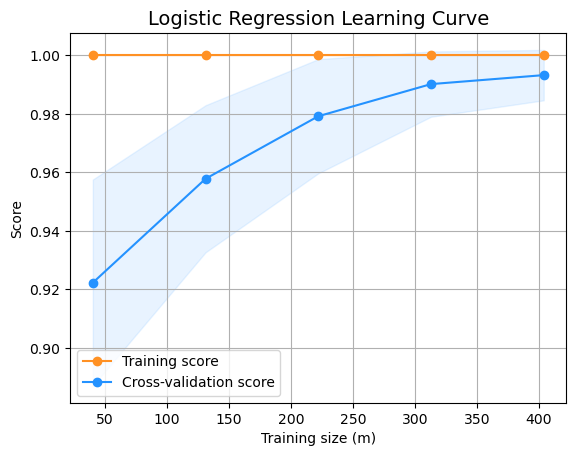

In [59]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
# print(cv)
# cv = 10
plot_learning_curve(log_reg, X_train, y_train, cv=cv, Title='Logistic Regression')

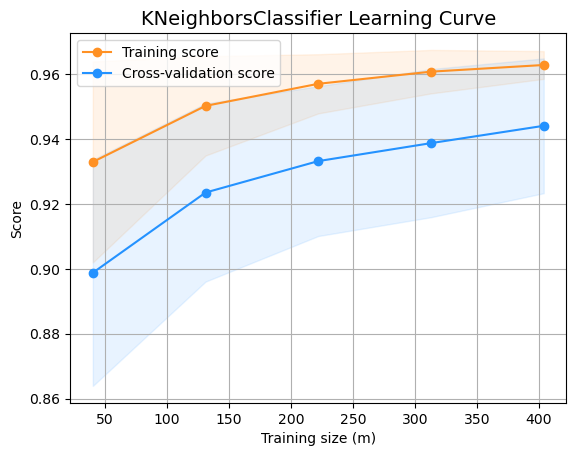

In [60]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(knears_neighbors, X_train, y_train, cv=cv, Title='KNeighborsClassifier')

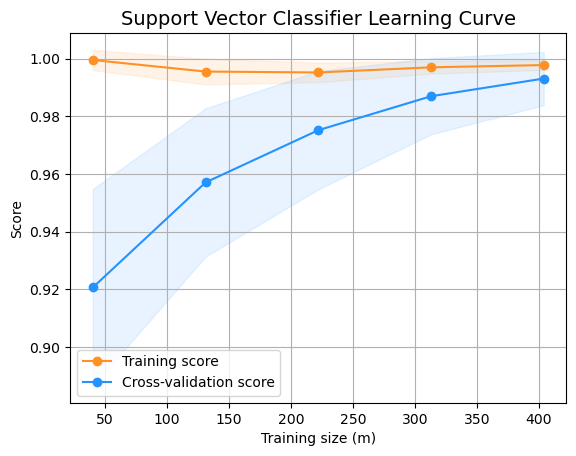

In [61]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(svc, X_train, y_train, cv=cv, Title='Support Vector Classifier')

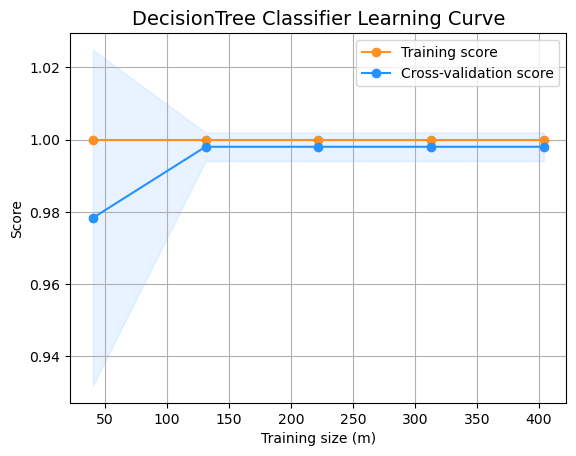

In [62]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(tree_clf, X_train, y_train, cv=cv, Title='DecisionTree Classifier')

In [63]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [64]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9996840142825544
KNears Neighbors:  0.9500505577147913
Support Vector Classifier:  0.9999052042847664
Decision Tree Classifier:  0.9981751824817517


#### A Deeper Look into LogisticRegression:
In this section we will ive a deeper look into the logistic regression classifier.

##### Terms:
* True Positives: Correctly Classified Fraud Transactions
* False Positives: Incorrectly Classified Fraud Transactions
* True Negative: Correctly Classified Non-Fraud Transactions
* False Negative: Incorrectly Classified Non-Fraud Transactions
* Precision: True Positives/(True Positives + False Positives)
* Recall: True Positives/(True Positives + False Negatives)

* Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.

###### Precision/Recall Tradeoff: 
* The more precise (selective) our model is, the less cases it will detect. 
* Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. 
* Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.

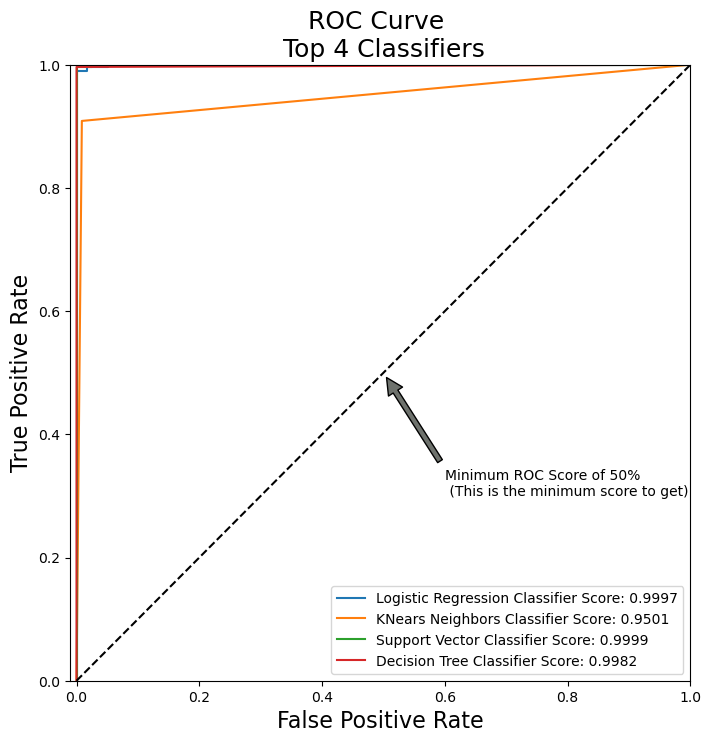

In [65]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [66]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [67]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# # How it should look like
# print('---' * 45)
# print('How it should be:\n')
# print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
# print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
# print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
# print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
# print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00
---------------------------------------------------------------------------------------------------------------------------------------


### SMOTE Technique (Over-Sampling):
SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

##### Understanding SMOTE:

* Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
* Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
* Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
* Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

### Overfitting during Cross Validation: (Cross Validation Overfitting Mistake)
* In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. 
* Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. In the following section you will see amazing precision and recall scores but in reality our data is overfitting!

##### The Wrong Way:
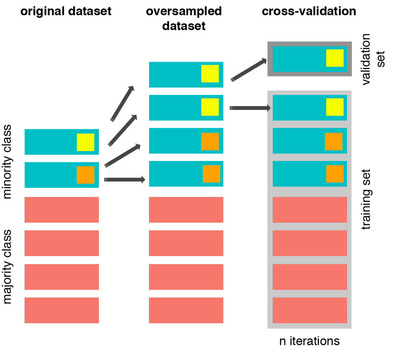

As mentioned previously, if we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cros!s validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below:

##### The Right Way:
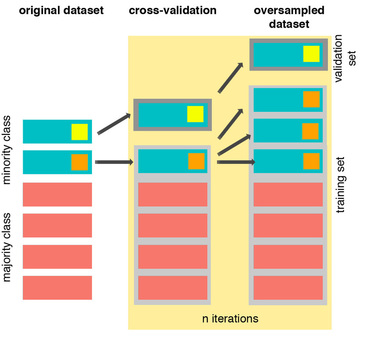

As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

In [68]:
len(df)

284807

In [69]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [70]:
outlier_index = []
thresold = 1.5
for i in list(target_pos_corr_features_dict.keys())[:-1]:
    for j in range(0,2):
        col_data = df[df['Class']==j][i]
        perc_25 = np.percentile(col_data, 25)
        perc_75 = np.percentile(col_data, 75)
        iqr = perc_75 - perc_25
        print('Feature :',i, ', Class : ',j)
        print('25th Percentile :', "{:.2f}".format(perc_25), ', 75th Percentile :', "{:.2f}".format(perc_75), ', IQR :', "{:.2f}".format(iqr),'\n')
        print('No of Extreme outlires :',len(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].values))
        print(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].values)
        outlier_index.extend(list(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].index))
        print('-'*100)
            
    c=c+1

Feature : Time , Class :  0
25th Percentile : -0.36 , 75th Percentile : 0.64 , IQR : 1.00 

No of Extreme outlires : 0
[]
----------------------------------------------------------------------------------------------------
Feature : Time , Class :  1
25th Percentile : -0.51 , 75th Percentile : 0.51 , IQR : 1.02 

No of Extreme outlires : 0
[]
----------------------------------------------------------------------------------------------------
Feature : V2 , Class :  0
25th Percentile : -0.60 , 75th Percentile : 0.80 , IQR : 1.40 

No of Extreme outlires : 13327
[-5.45014783 -4.42918377 -4.14600725 ... -3.11635274 10.18781804
 10.07178497]
----------------------------------------------------------------------------------------------------
Feature : V2 , Class :  1
25th Percentile : 1.19 , 75th Percentile : 4.97 , IQR : 3.78 

No of Extreme outlires : 46
[10.81966537 11.58638052 11.81792199 12.09589323 12.37398914 12.65219683
 12.93050512 13.20890428 13.48738579 13.76594216 14.04456678 14

In [71]:
outlier_index = []
thresold = 1.5
for i in list(target_neg_corr_features_dict.keys())[:-1]:
    for j in range(0,2):
        col_data = df[df['Class']==j][i]
        perc_25 = np.percentile(col_data, 25)
        perc_75 = np.percentile(col_data, 75)
        iqr = perc_75 - perc_25
        print('Feature :',i, ', Class : ',j)
        print('25th Percentile :', "{:.2f}".format(perc_25), ', 75th Percentile :', "{:.2f}".format(perc_75), ', IQR :', "{:.2f}".format(iqr),'\n')
        print('No of Extreme outlires :',len(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].values))
        print(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].values)
        outlier_index.extend(list(col_data[(col_data>perc_75 + thresold*iqr) | (col_data< perc_25 - thresold*iqr)].index))
        print('-'*100)
            
    c=c+1

Feature : V1 , Class :  0
25th Percentile : -0.92 , 75th Percentile : 1.32 , IQR : 2.23 

No of Extreme outlires : 6912
[ -5.40125766  -4.57509261  -5.10187714 ...  -6.71382562 -12.51673185
 -11.88111789]
----------------------------------------------------------------------------------------------------
Feature : V1 , Class :  1
25th Percentile : -6.04 , 75th Percentile : -0.42 , IQR : 5.62 

No of Extreme outlires : 52
[-14.47443749 -15.39884501 -14.72462701 -15.27136186 -15.81917872
 -16.36792301 -16.91746827 -17.46771001 -18.01856119 -15.9036352
 -16.59866474 -17.27519119 -18.4748679  -19.17982641 -19.85632233
 -20.53275108 -21.20911959 -21.88543391 -22.56169926 -23.23792024
 -23.91410089 -24.59024477 -25.26635502 -25.94243445 -27.14367842
 -27.84818067 -28.52426759 -29.20032859 -29.87636551 -30.55238004
 -15.0209806  -14.97034565 -15.14044962 -16.52650657 -18.24751323
 -19.13973286 -20.9069081  -26.45774465 -26.45774465 -26.45774465
 -26.45774465 -15.19206401 -16.30865006 -17.5189

In [72]:
df_pro = df[['V2', 'V4', 'V6', 'V9', 'V11', 'V12', 'Time', 'Class']]


In [73]:
X = df.drop(columns=['Class'])
y = df['Class']

In [74]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, average_precision_score
from sklearn.model_selection import StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size=0.33, random_state=42, stratify = y)

In [75]:
X_sub.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [76]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [77]:
original_Xtrain = X_train[:]
original_ytrain = y_train[:]
original_Xtest = X_test[:]
original_ytest = y_test[:]

In [78]:
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []
log_reg_final = LogisticRegression()
log_reg_params = {"penalty": ['l1', 'l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementing SMOTE Technique 
# Cross Validating the right way

sss = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
for train, test in sss.split( X = original_Xtrain, y = original_ytrain):
    pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)



---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9772123816511198
precision: 0.06425431191797429
recall: 0.8964646464646464
f1: 0.11989713399455469
---------------------------------------------------------------------------------------------------------------------------------------


In [79]:
accuracy_lst

[0.9763302239457778,
 0.9789330258882717,
 0.9771687104775879,
 0.9764175662928414]

In [80]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     93825
       Fraud       0.06      0.89      0.11       162

    accuracy                           0.98     93987
   macro avg       0.53      0.93      0.55     93987
weighted avg       1.00      0.98      0.99     93987



In [81]:
y_score = best_est.decision_function(original_Xtest)

In [82]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.73


In [83]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

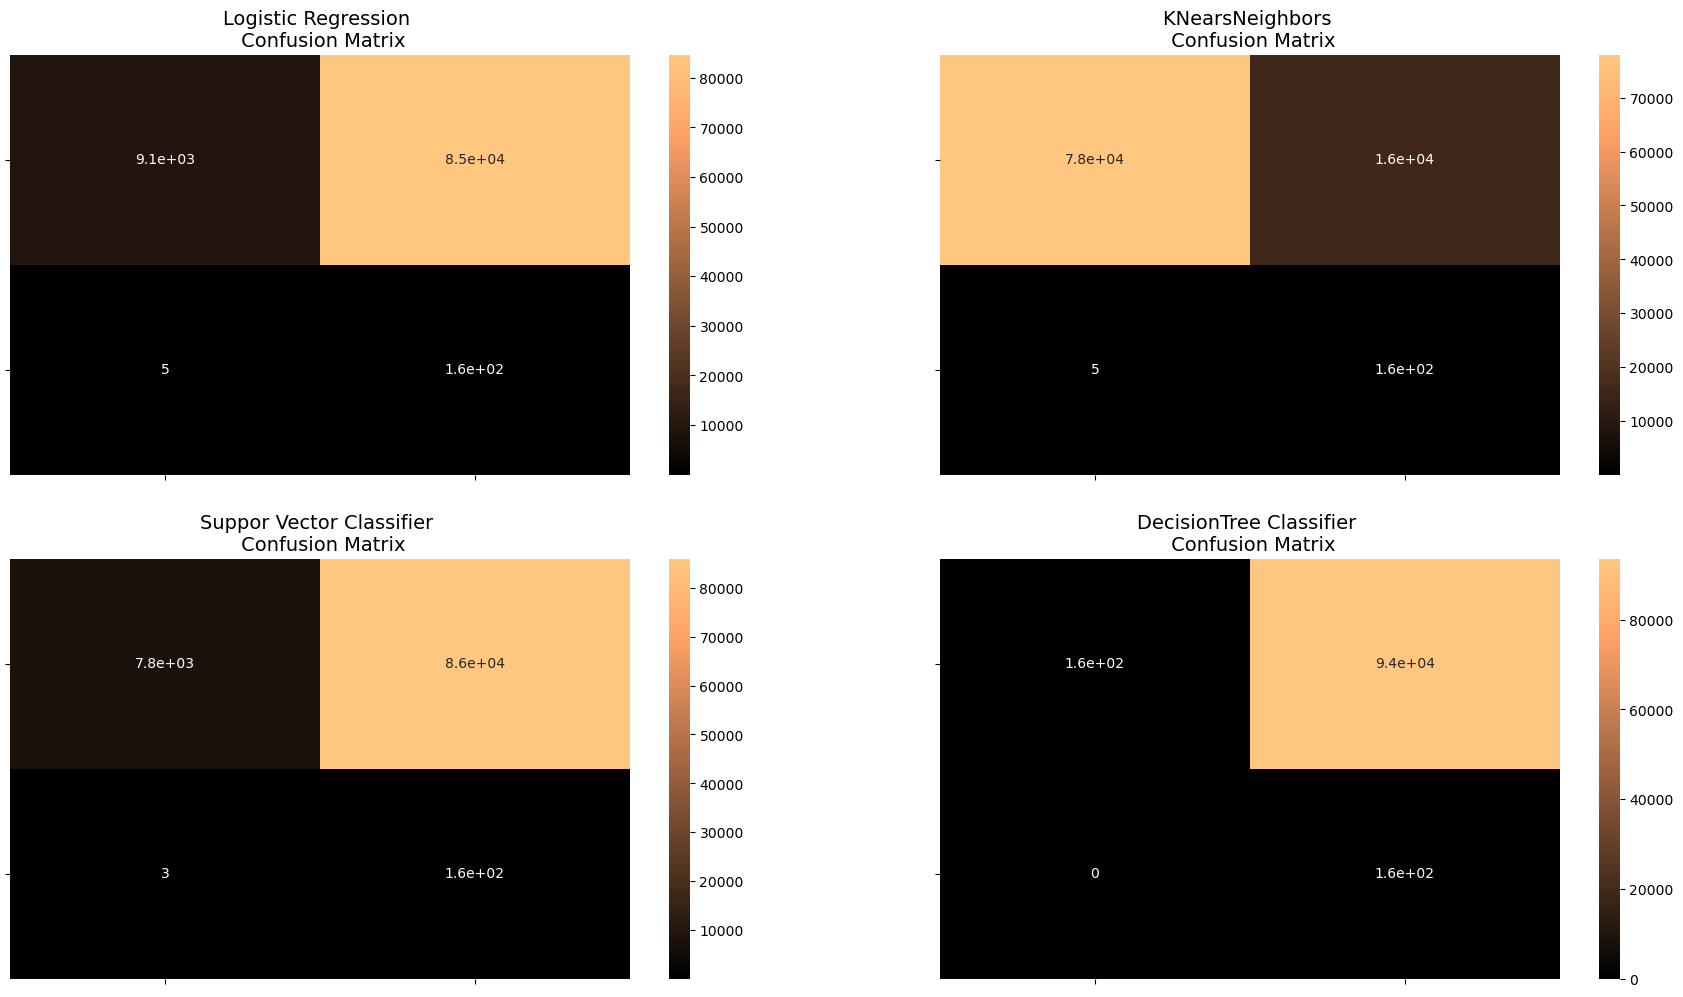

In [84]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [85]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.10      0.18     93825
           1       0.00      0.97      0.00       162

    accuracy                           0.10     93987
   macro avg       0.50      0.53      0.09     93987
weighted avg       1.00      0.10      0.18     93987

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     93825
           1       0.01      0.97      0.02       162

    accuracy                           0.83     93987
   macro avg       0.50      0.90      0.46     93987
weighted avg       1.00      0.83      0.91     93987

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15     93825
           1       0.00      0.98      0.00       162

    accuracy                           0.08     93987
   macro avg       0.50      0.53      0.08     93987
weighted

In [86]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.098833
1,Oversampling (SMOTE),0.976263
